In [3]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report
sns.set(style='darkgrid',color_codes=True)
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [4]:
#loading the dataset
df1=pd.read_csv('../input/confused-eeg/EEG_data.csv')
df2=pd.read_csv('../input/confused-eeg/demographic_info.csv')
df1

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


In [5]:
df2

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


# > Merging the DataFrame

In [6]:
#renaming the column names
df2.rename(columns={'subject ID':'SubjectID'},inplace=True)

In [7]:
#merging the df1 and df2 dataset
df=df2.merge(df1,on='SubjectID')

In [8]:
#getting informatio about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  int64  
 1    age                12811 non-null  int64  
 2    ethnicity          12811 non-null  object 
 3    gender             12811 non-null  object 
 4   VideoID             12811 non-null  float64
 5   Attention           12811 non-null  float64
 6   Mediation           12811 non-null  float64
 7   Raw                 12811 non-null  float64
 8   Delta               12811 non-null  float64
 9   Theta               12811 non-null  float64
 10  Alpha1              12811 non-null  float64
 11  Alpha2              12811 non-null  float64
 12  Beta1               12811 non-null  float64
 13  Beta2               12811 non-null  float64
 14  Gamma1              12811 non-null  float64
 15  Gamma2              12811 non-null  float64
 16  pred

In [9]:
#droping unneeded column
df=df.drop(['SubjectID','VideoID','predefinedlabel'],axis=1)

In [10]:
df.columns

Index([' age', ' ethnicity', ' gender', 'Attention', 'Mediation', 'Raw',
       'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1',
       'Gamma2', 'user-definedlabeln'],
      dtype='object')

In [11]:
#renaming the column name
df=df.rename(columns={' age':'Age',' ethnicity':'Ethnicity',' gender':'Gender','user-definedlabeln':'Label'})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        12811 non-null  int64  
 1   Ethnicity  12811 non-null  object 
 2   Gender     12811 non-null  object 
 3   Attention  12811 non-null  float64
 4   Mediation  12811 non-null  float64
 5   Raw        12811 non-null  float64
 6   Delta      12811 non-null  float64
 7   Theta      12811 non-null  float64
 8   Alpha1     12811 non-null  float64
 9   Alpha2     12811 non-null  float64
 10  Beta1      12811 non-null  float64
 11  Beta2      12811 non-null  float64
 12  Gamma1     12811 non-null  float64
 13  Gamma2     12811 non-null  float64
 14  Label      12811 non-null  float64
dtypes: float64(12), int64(1), object(2)
memory usage: 1.6+ MB


In [13]:
#changing the datatype of label column from object to int
df['Label']=df['Label'].astype(np.int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        12811 non-null  int64  
 1   Ethnicity  12811 non-null  object 
 2   Gender     12811 non-null  object 
 3   Attention  12811 non-null  float64
 4   Mediation  12811 non-null  float64
 5   Raw        12811 non-null  float64
 6   Delta      12811 non-null  float64
 7   Theta      12811 non-null  float64
 8   Alpha1     12811 non-null  float64
 9   Alpha2     12811 non-null  float64
 10  Beta1      12811 non-null  float64
 11  Beta2      12811 non-null  float64
 12  Gamma1     12811 non-null  float64
 13  Gamma2     12811 non-null  float64
 14  Label      12811 non-null  int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 1.6+ MB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [14]:
#checking the missing values
df.isna().sum().sum()

0

In [15]:
#checking for unique values
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [16]:
#encoding gender column with 0 and 1
df['Gender']=df['Gender'].apply(lambda x:1 if x=='M' else 0)

In [17]:
df

,Age,Ethnicity,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label
0,25,Han Chinese,1,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0
1,25,Han Chinese,1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0
2,25,Han Chinese,1,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0
3,25,Han Chinese,1,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0
4,25,Han Chinese,1,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,24,Han Chinese,0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,0
12807,24,Han Chinese,0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,0
12808,24,Han Chinese,0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,0
12809,24,Han Chinese,0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,0


In [18]:
#checking ethnicity column unique value
df['Ethnicity'].unique()

array(['Han Chinese', 'English', 'Bengali'], dtype=object)

In [19]:
ethnicity_dummies=pd.get_dummies(df['Ethnicity'])
df=pd.concat([df,ethnicity_dummies],axis=1)
df=df.drop('Ethnicity',axis=1)

In [20]:
df

,Age,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label,Bengali,English,Han Chinese
0,25,1,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0,0,0,1
1,25,1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0,0,0,1
2,25,1,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0,0,0,1
3,25,1,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0,0,0,1
4,25,1,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,24,0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,0,0,0,1
12807,24,0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,0,0,0,1
12808,24,0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,0,0,0,1
12809,24,0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,0,0,0,1


In [21]:
#printining non numerical column
len(df.select_dtypes('object').columns)

0

In [22]:
#checking for datatypes
df.dtypes

Age              int64
Gender           int64
Attention      float64
Mediation      float64
Raw            float64
Delta          float64
Theta          float64
Alpha1         float64
Alpha2         float64
Beta1          float64
Beta2          float64
Gamma1         float64
Gamma2         float64
Label            int64
Bengali          uint8
English          uint8
Han Chinese      uint8
dtype: object

In [23]:
#creating features and target column
features=df.drop('Label',axis=1).copy()


In [24]:
#saving categorical and continuous features
categorical_features=['Age','Gender','Bengali','English','Han Chinese']
continous_features=['Attention','Mediation','Raw','Delta','Theta','Alpha1','Alpha2','Beta1','Beta2','Gamma1','Gamma2']

In [25]:
print('Categorical Features',len(categorical_features))
print('Continous Features',len(continous_features))

Categorical Features 5
Continous Features 11


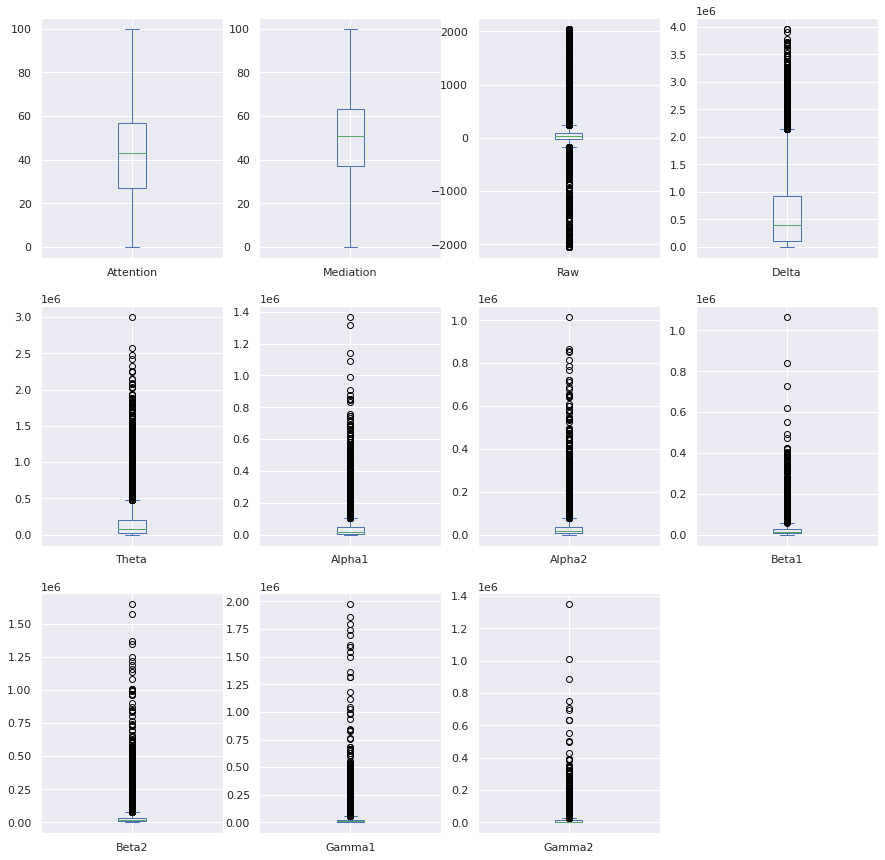

In [26]:
#creating boxplot
features[continous_features].plot(kind='box',figsize=(15,15),subplots=True,layout=(3,4))
plt.show()

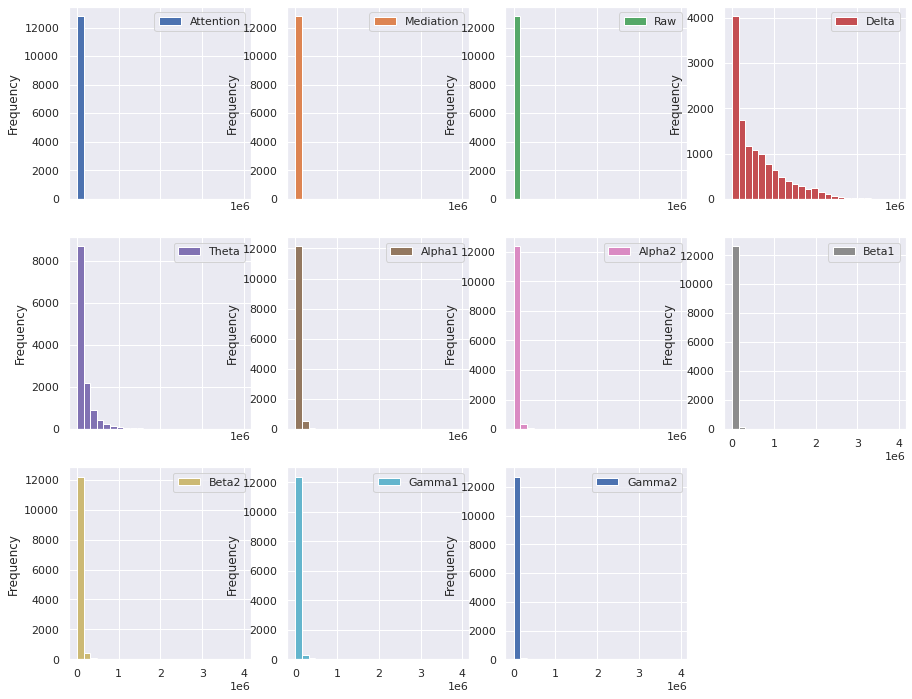

In [27]:
#ploting histogram
features[continous_features].plot(kind='hist',bins=25,
                                  figsize=(15,12),subplots=True,layout=(3,4))
plt.show()

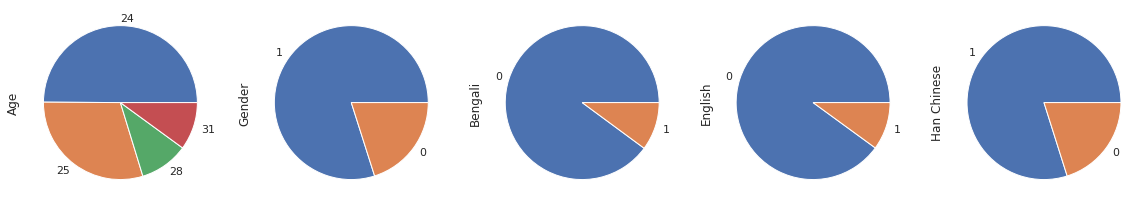

In [36]:
#creating pie plot
plt.figure(figsize=(20,5))
for feature in categorical_features:
    plt.subplot(1,5,categorical_features.index(feature)+1)
    features[feature].value_counts().plot(kind='pie')
plt.show()

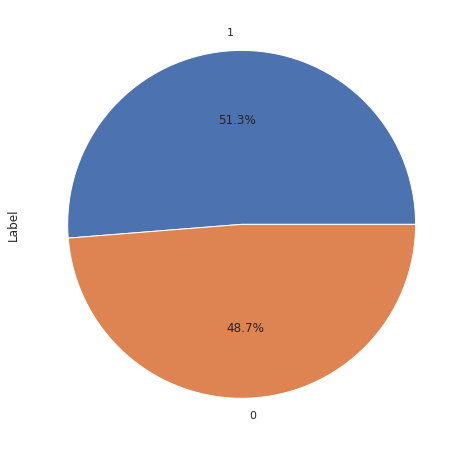

In [37]:
plt.figure(figsize=(8,8))
df['Label'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

# #Multivariate Analysis

<Figure size 1440x1440 with 0 Axes>

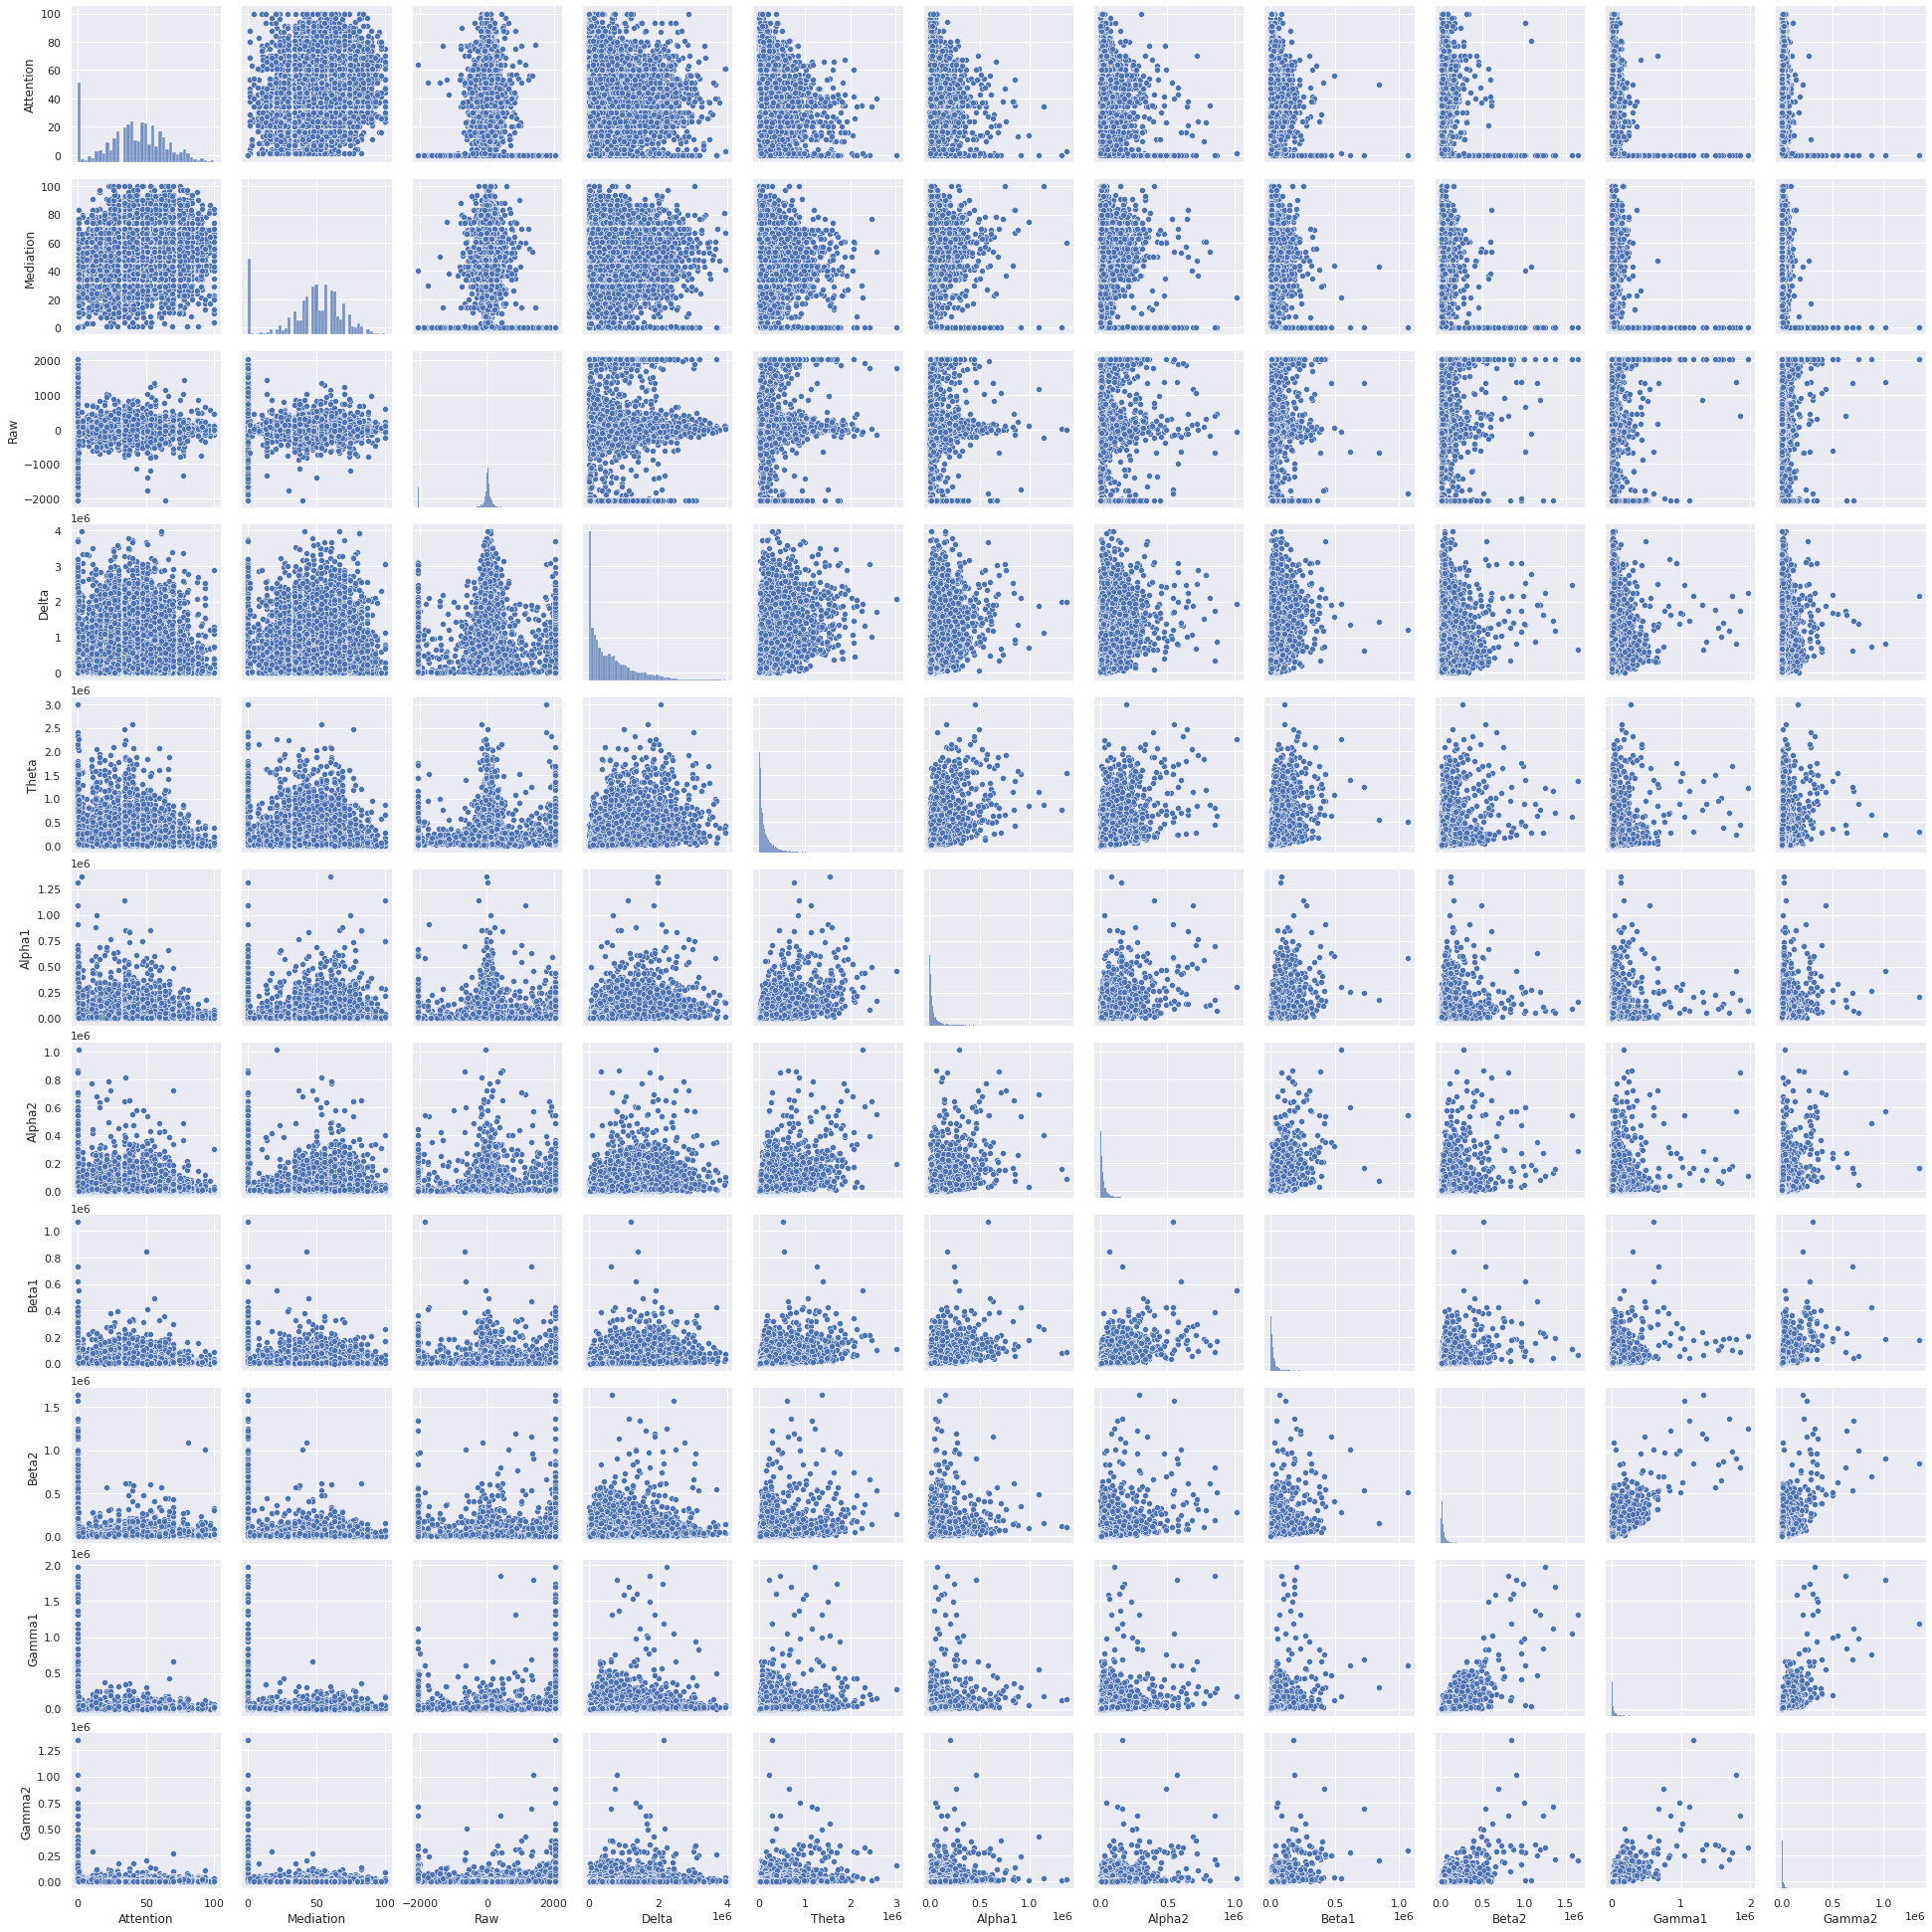

In [41]:
plt.figure(figsize=(20,20))
sns.pairplot(features[continous_features])
plt.show()


# #Creating Heatmap

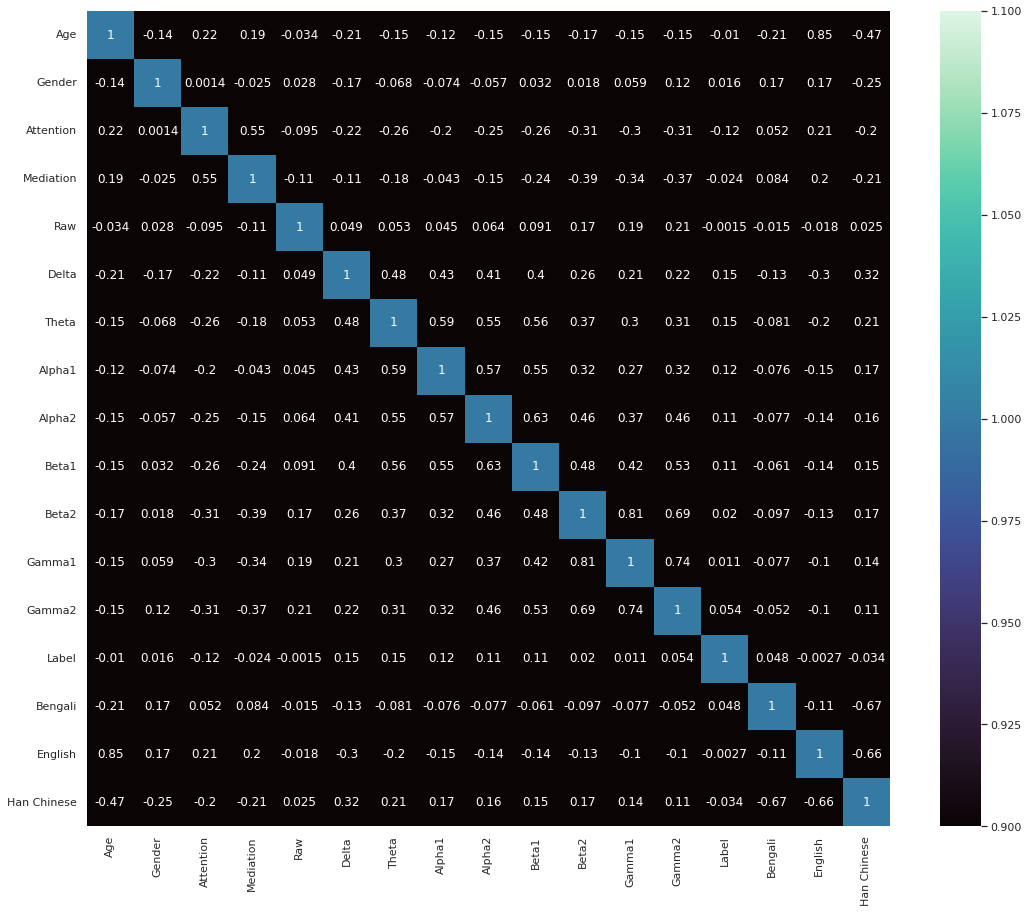

In [43]:
#Creating heatmap
corr=df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True,vmin=1.0,cmap='mako')
plt.show()

In [44]:
y=df['Label'].copy()
x=df.drop('Label',axis=1).copy()

In [46]:
#scaling the dataset
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [48]:
#spliting the dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

# Training the model

In [53]:
inputs=tf.keras.Input(shape=(x_train.shape[1]))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs,outputs)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')]
)
batch_size=32
epochs=50
history=model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ])

2022-02-28 04:57:38.323951: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
225/225 [==============================] - 2s 5ms/step - loss: 0.6546 - accuracy: 0.6152 - auc: 0.6623 - val_loss: 0.6428 - val_accuracy: 0.6399 - val_auc: 0.6803
Epoch 2/50
225/225 [==============================] - 1s 3ms/step - loss: 0.6372 - accuracy: 0.6340 - auc: 0.6856 - val_loss: 0.6358 - val_accuracy: 0.6282 - val_auc: 0.6868
Epoch 3/50
225/225 [==============================] - 1s 3ms/step - loss: 0.6265 - accuracy: 0.6444 - auc: 0.7020 - val_loss: 0.6247 - val_accuracy: 0.6460 - val_auc: 0.7031
Epoch 4/50
225/225 [==============================] - 1s 3ms/step - loss: 0.6213 - accuracy: 0.6517 - auc: 0.7094 - val_loss: 0.6186 - val_accuracy: 0.6527 - val_auc: 0.7133
Epoch 5/50
225/225 [==============================] - 1s 3ms/step - loss: 0.6154 - accuracy: 0.6547 - auc: 0.7183 - val_loss: 0.6199 - val_accuracy: 0.6605 - val_auc: 0.7119
Epoch 6/50
225/225 [==============================] - 1s 3ms/step - loss: 0.6081 - accuracy: 0.6640 - auc: 0.7269 - val_loss: 0.61

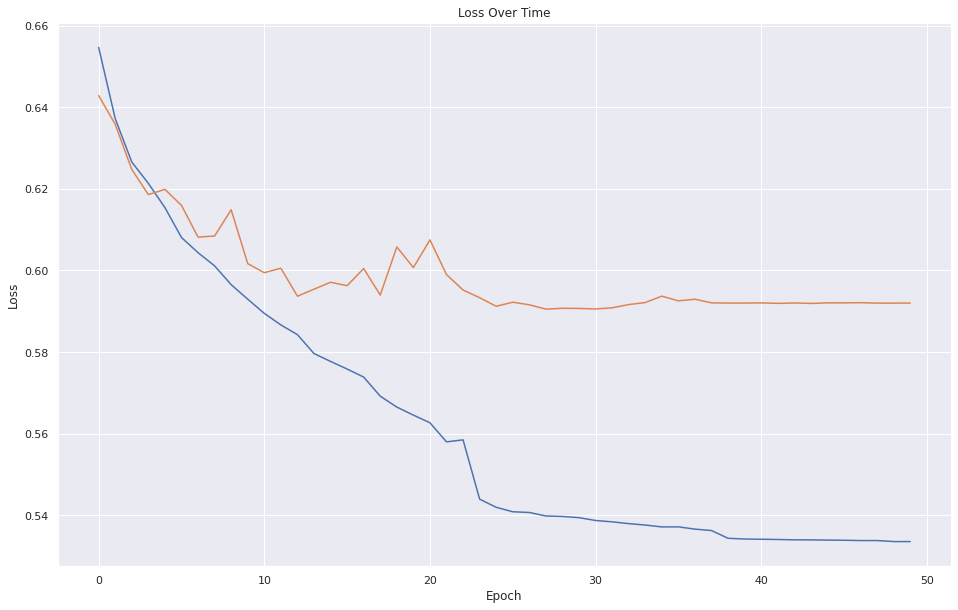

In [55]:
plt.figure(figsize=(16,10))
plt.plot(range(epochs),history.history['loss'],label='Training Loss')
plt.plot(range(epochs),history.history['val_loss'],label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.show()

# Results

In [56]:
model.evaluate(x_test,y_test)

121/121 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.6545 - auc: 0.7163


[0.627406895160675, 0.6545265316963196, 0.7162905931472778]